In [2]:
# Heart Disease Prediction

## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=columns)

# Replace missing values marked as '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert columns with missing values to float
df = df.astype(float)



In [5]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Convert target variable to binary (0: no heart disease, 1: heart disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Split data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


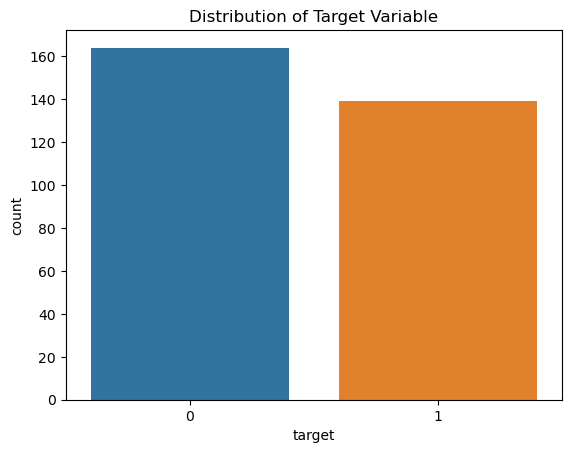

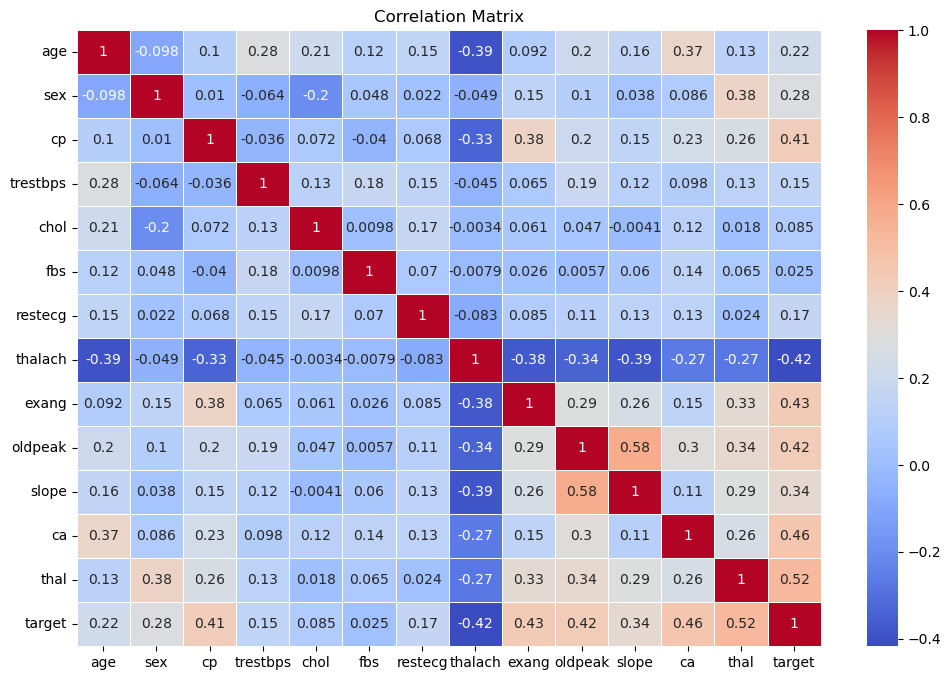

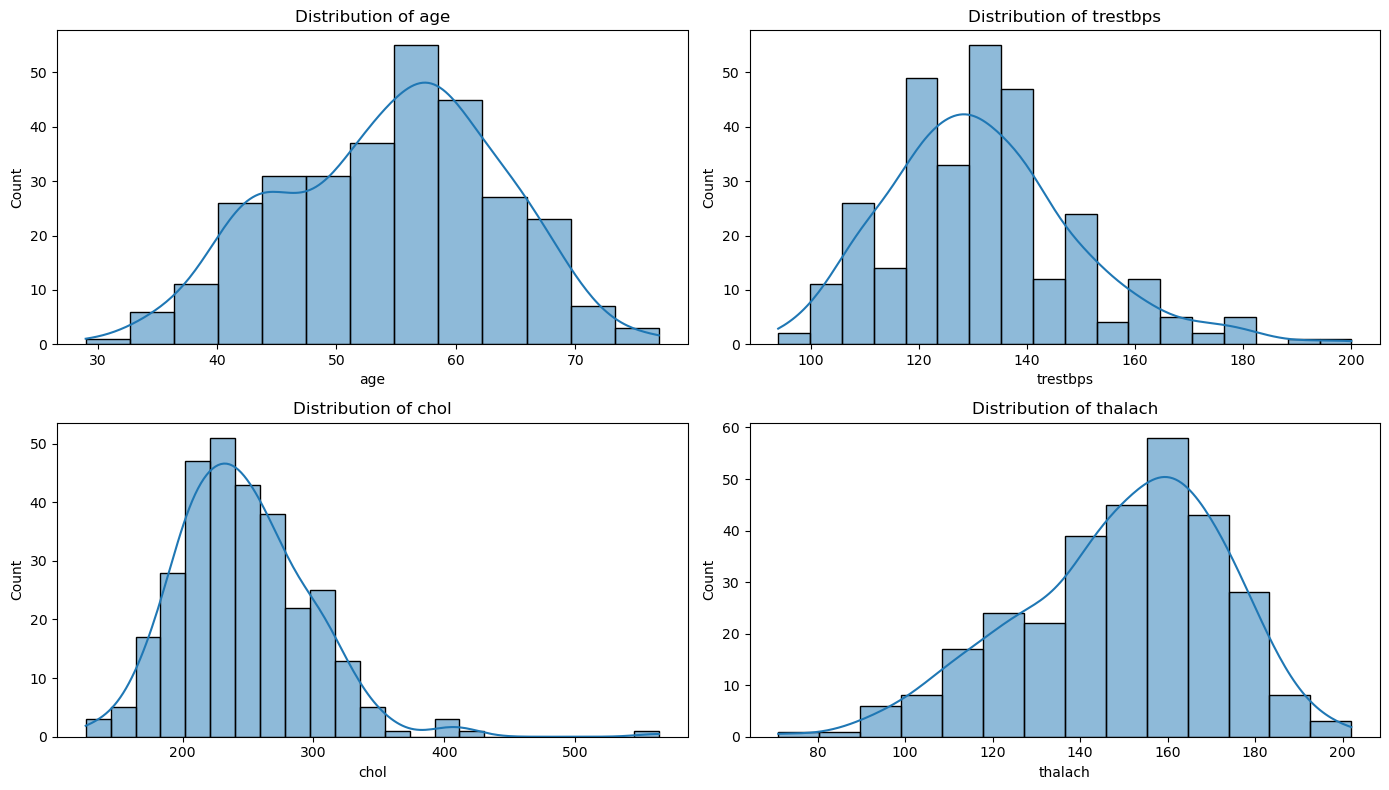

In [6]:
# Display first few rows of the dataset
df.head()

# Summary statistics
df.describe()

# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of key features
plt.figure(figsize=(14, 8))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalach']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



In [7]:
# Build a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.85
Confusion Matrix:
[[39  9]
 [ 5 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        48
           1       0.81      0.88      0.84        43

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



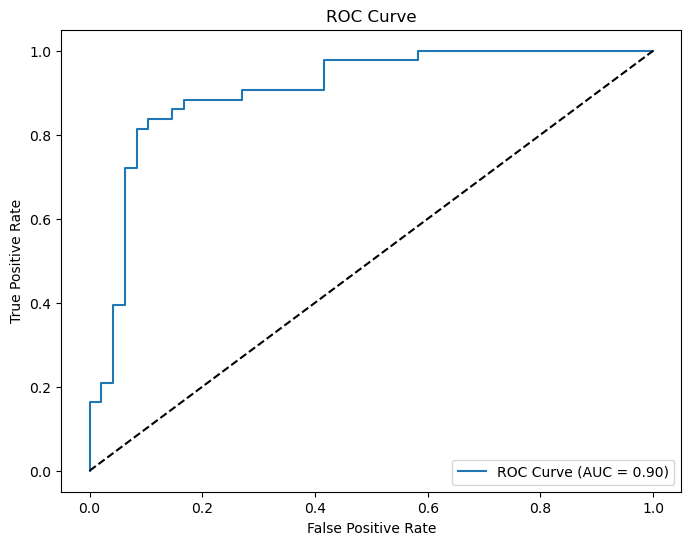

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [9]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print(coefficients)

# Interpretation of the model
print('The coefficients indicate the strength and direction of the relationship between each feature and the target variable.')
print('Positive coefficients indicate a higher likelihood of heart disease, while negative coefficients indicate a lower likelihood.')


          Coefficient
age         -0.000036
sex          0.761903
cp           0.426652
trestbps     0.283777
chol         0.349247
fbs         -0.090771
restecg      0.094657
thalach     -0.371220
exang        0.542785
oldpeak      0.082302
slope        0.384680
ca           1.381354
thal         0.505769
The coefficients indicate the strength and direction of the relationship between each feature and the target variable.
Positive coefficients indicate a higher likelihood of heart disease, while negative coefficients indicate a lower likelihood.
